Importing packages

In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from kneed import KneeLocator
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

Task 1.1

Just loading in the data and displaying some of it to show that it is correctly loaded.

In [93]:
customer_data = pd.read_csv('./customerdata4.csv')
customer_data.describe()

,CustomerID,Age,Annual Income (10kkr),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [94]:
customer_data[:5]

,CustomerID,Gender,Age,Annual Income (10kkr),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Task 1.2

Boxplots showing all the categories divided into male and female.

<AxesSubplot:xlabel='Age', ylabel='Gender'>

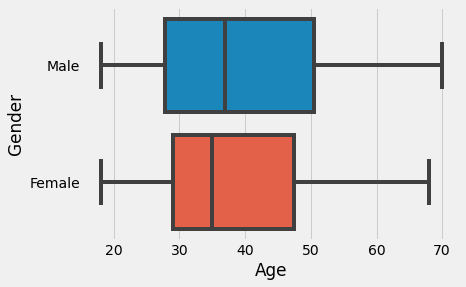

In [95]:
sns.boxplot(data=customer_data, y='Gender', x='Age')

Looking at this graph we can see that the median, the 2nd quartile and the 3rd quartile are more "compact" for women meaning the a larger proportion of women are closer in age in the 30-47 range while men looks more like 28-51. The lowest age seems to be roughly the same for both but the oldest man is a few years older than the oldest woman.

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Gender'>

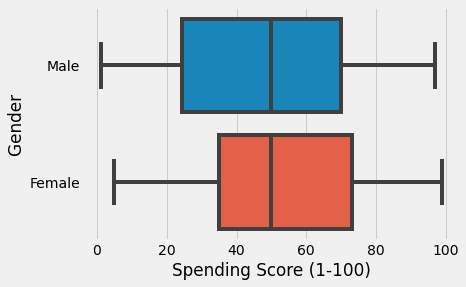

In [96]:
sns.boxplot(data=customer_data, y='Gender', x='Spending Score (1-100)')

This graph is quite interesting because it seems like the spending score for women is a little higher on average. We can see that the men are way more spread but their median is roughly the same as the womens. The lowest male is also lower than the lowest female according to this graph. It seems like women spend more on average than men according to this data.

<AxesSubplot:xlabel='Annual Income (10kkr)', ylabel='Gender'>

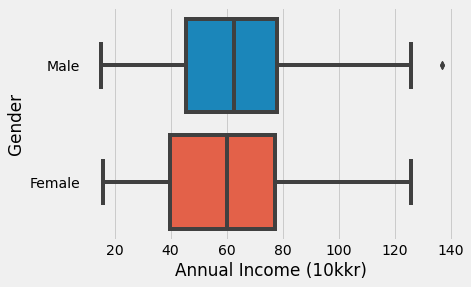

In [97]:
sns.boxplot(data=customer_data, y='Gender', x='Annual Income (10kkr)')

Here we see that they're roughly equal but the spread is smaller for men than for women on the 2nd and 3rd quartile. This indicates, to me, that men on average earn more than women according to this data.

Task 1.3

Clustering of data using Age and Spending.

In [98]:
age = []
spending = []
annual = []
age_label = ""
spending_label = ""
annual_label = ""

with open('customerdata4.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    lines = 0
    for row in reader:
        if lines >= 1:
            print(', '.join(row))
            age.append(float(row[2]))
            annual.append(float(row[3]))
            spending.append(float(row[4]))
            lines += 1
        else:
            age_label = row[2]
            annual_label = row[3]
            spending_label = row[4]
            print(', '.join(row))
            lines += 1


CustomerID, Gender, Age, Annual Income (10kkr), Spending Score (1-100)
1, Male, 19, 15, 39
2, Male, 21, 15, 81
3, Female, 20, 16, 6
4, Female, 23, 16, 77
5, Female, 31, 17, 40
6, Female, 22, 17, 76
7, Female, 35, 18, 6
8, Female, 23, 18, 94
9, Male, 64, 19, 3
10, Female, 30, 19, 72
11, Male, 67, 19, 14
12, Female, 35, 19, 99
13, Female, 58, 20, 15
14, Female, 24, 20, 77
15, Male, 37, 20, 13
16, Male, 22, 20, 79
17, Female, 35, 21, 35
18, Male, 20, 21, 66
19, Male, 52, 23, 29
20, Female, 35, 23, 98
21, Male, 35, 24, 35
22, Male, 25, 24, 73
23, Female, 46, 25, 5
24, Male, 31, 25, 73
25, Female, 54, 28, 14
26, Male, 29, 28, 82
27, Female, 45, 28, 32
28, Male, 35, 28, 61
29, Female, 40, 29, 31
30, Female, 23, 29, 87
31, Male, 60, 30, 4
32, Female, 21, 30, 73
33, Male, 53, 33, 4
34, Male, 18, 33, 92
35, Female, 49, 33, 14
36, Female, 21, 33, 81
37, Female, 42, 34, 17
38, Female, 30, 34, 73
39, Female, 36, 37, 26
40, Female, 20, 37, 75
41, Female, 65, 38, 35
42, Male, 24, 38, 92
43, Male, 48

Formatting data so that I have lists with the values of Age, Spending Score and Annual Income.

In [99]:
age_spending_array = np.vstack((age, spending)).T
age_spending_array[:5]

array([[19., 39.],
       [21., 81.],
       [20.,  6.],
       [23., 77.],
       [31., 40.]])

I put them into a numpy array.

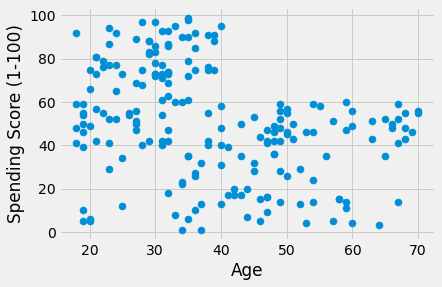

In [100]:
plt.xlabel(age_label)
plt.ylabel(spending_label)
plt.scatter(age, spending, s=50)

I visualize the data using a scatterplot.

In [101]:
scaler = StandardScaler()
scaled_age_spending_array = scaler.fit_transform(age_spending_array)
scaled_age_spending_array[:5]

array([[-1.42456879, -0.43480148],
       [-1.28103541,  1.19570407],
       [-1.3528021 , -1.71591298],
       [-1.13750203,  1.04041783],
       [-0.56336851, -0.39597992]])

I standardize the data. Standardizing the data means that I centralize each data point around 0 with the standard deviation of 1. This is better for the algorithm.

In [102]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_age_spending_array)
    sse.append(kmeans.inertia_)

C:\Users\zangi\anaconda3\envs\tf26\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


I am not iterating through k to find the SSE values.

!!!!Worth noting that I get a userwarning about memory leaks. I believe this is because I use an AMD processor. It does not seem to affect the result of the output so therefore I am ignoring it.

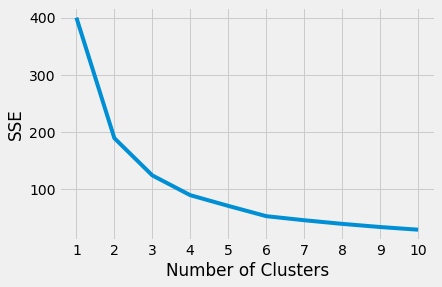

In [103]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

I use this to plot the graph, this will show many clusters I want to use.

In [104]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

Using this simple method I let code read the graph for me and it shows that I want to use 3 clusters.

In [105]:
kmeans = KMeans(
    init="random",
    n_clusters=kl.elbow,    
    n_init=10,
    max_iter=300,
    random_state=42
)

I set clusters = kl.elbow which is 3 and have some other settings for my kmeans

In [106]:
kmeans.fit(scaled_age_spending_array)
kmeans.inertia_
centers = kmeans.cluster_centers_
kmeans.n_iter_
kmeans.labels_[:5]

array([1, 2, 1, 2, 1])

I find the clusters using kmeans.

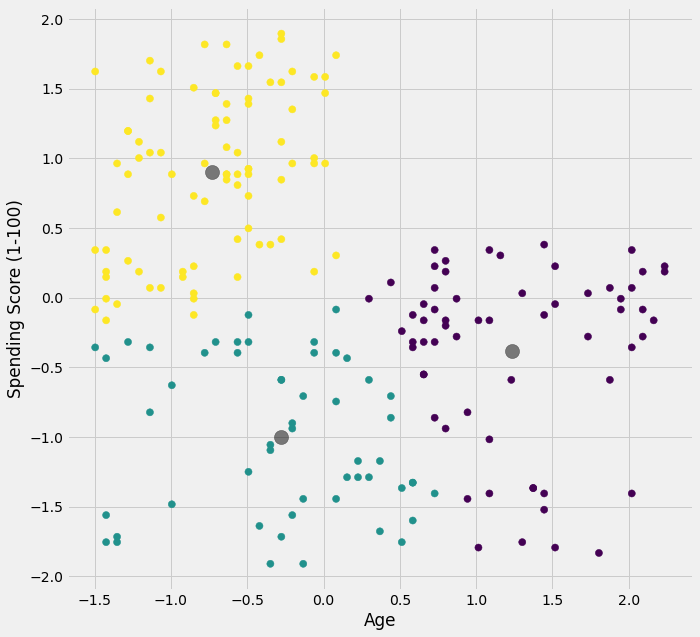

In [107]:
plt.figure(figsize=(10,10))
plt.xlabel(age_label)
plt.ylabel(spending_label)
y_kmeans = kmeans.predict(scaled_age_spending_array)
plt.scatter(scaled_age_spending_array[:, 0], scaled_age_spending_array[:,1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

I visualize the data and the clusters. The colors are decided based on which cluster is the closest and each color is therefore a different group. 

Purple = Older but lower spending. 

Turquoise = Younger and lower spending. 

Yellow = Young and higher spending.

Task 1.4

In [108]:
annual_spending_array = np.vstack((annual, spending)).T

Put annual income and spending score into a numpy array.

In [109]:
scaled_annual_spending_array = scaler.fit_transform(annual_spending_array)
scaled_annual_spending_array[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

Standardizing the data.

In [110]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_annual_spending_array)
    sse.append(kmeans.inertia_)

C:\Users\zangi\anaconda3\envs\tf26\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Look for SSE values in each k.

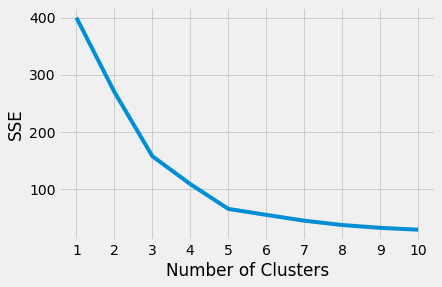

In [111]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Visualize to see how many clusters I want.

In [112]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

5

Using method to show I want 5 clusters.

In [113]:
kmeans = KMeans(
    init="random",
    n_clusters=kl.elbow,
    n_init=10,
    max_iter=300,
    random_state=42
)

Just settings for algorithm.

In [114]:
kmeans.fit(scaled_annual_spending_array)
kmeans.inertia_
centers = kmeans.cluster_centers_
kmeans.n_iter_
kmeans.labels_[:5]

array([0, 3, 0, 3, 0])

Run the algorithm to get the results.

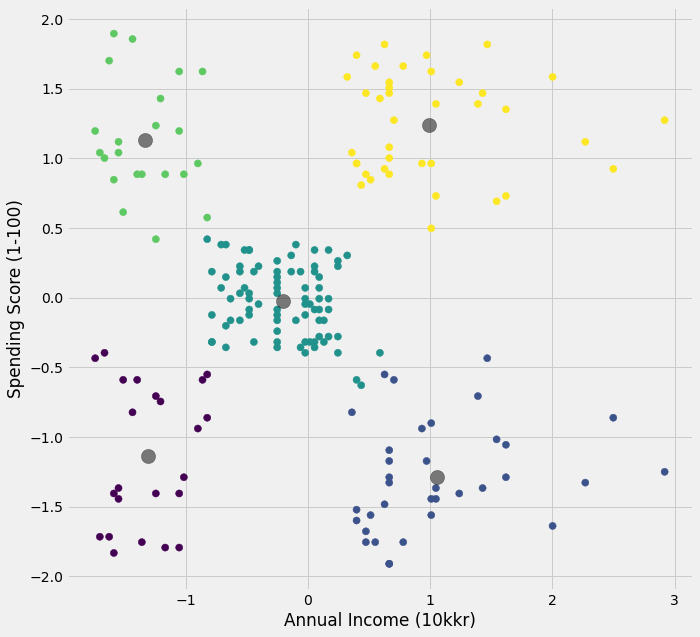

In [115]:
plt.figure(figsize=(10,10))
plt.xlabel(annual_label)
plt.ylabel(spending_label)
y_kmeans = kmeans.predict(scaled_annual_spending_array)
plt.scatter(scaled_annual_spending_array[:, 0], scaled_annual_spending_array[:,1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)

Visualization of the results.

Purple = low income and low spending.

Green = low income and high spending.

Yellow = high income and high spending.

Blue = high income and low spending

Turquoise = sort of a middle ground between income and spending.
